# Peak ocean carbon uptake 

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
#! ls /global/cfs/cdirs/m3920/dataset/cmip6/*/fgco2*ssp*
model=['ACCESS-ESM1-5', 'CESM2','CanESM5','GFDL-ESM4','IPSL-CM6A-LR','MPI-ESM1-2-HR','NorESM2-LM']
diro='/global/cfs/cdirs/m3920/dataset/cmip6/'

In [3]:
#! ls /global/cfs/cdirs/m3920/dataset/cmip6/*/fgco2*hsp585*

/global/homes/t/takaito/miniconda3/envs/calc/lib/python3.8/site-packages/xarray/coding/times.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/global/homes/t/takaito/miniconda3/envs/calc/lib/python3.8/site-packages/xarray/coding/times.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/global/homes/t/takaito/miniconda3/envs/calc/lib/python3.8/site-packages/xarray/core/indexing.py:422: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/global/h

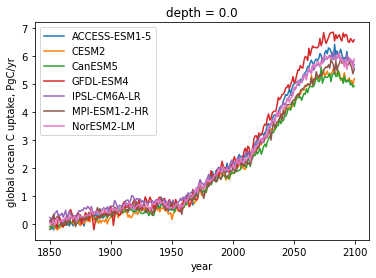

In [4]:
fn=[]
Nm=np.size(model)
# calculate global uptake
R=6.37e6
cfac=1/12*1e3*365.25*86400*12e-15
dx=1
latlim=40
fgco2_global=np.empty((250,Nm))
fgco2_NA=np.empty((250,Nm))
#
for n in range(Nm):
    fn.append(diro+model[n]+'/fgco2_'+model[n]+'_Omon_hsp585_woagrid.nc')
    ds=xr.open_dataset(fn[n])
    weights=np.cos(np.deg2rad(ds.lat))*(R*np.pi/180*dx)**2
    weights.name = "weights"
    #
    fgco20=ds.fgco2.sel(time=slice('1850-01','2099-12')).groupby('time.year').mean(dim='time')
    year=fgco20.year
    #
    fgco2=fgco20#.where((ds.lat>=latlim)&((ds.lon>(360-85))|(ds.lon<10))) 
    fgco2_weighted=fgco2.weighted(weights)
    co2uptake=cfac*fgco2_weighted.sum(('lon','lat'))
    #
    fgco2=fgco20.where((ds.lat>=latlim)&((ds.lon>(360-85))|(ds.lon<10))) 
    fgco2_weighted=fgco2.weighted(weights)
    co2uptake_NA=cfac*fgco2_weighted.sum(('lon','lat'))
    #
    co2uptake.plot(label=model[n])
    fgco2_global[:,n]=co2uptake.to_numpy()
    fgco2_NA[:,n]=co2uptake_NA.to_numpy()
    #
plt.ylabel('global ocean C uptake, PgC/yr')    
plt.legend()
plt.show()

Text(0, 0.5, 'North Atlantic C uptake: >40N, PgC/yr')

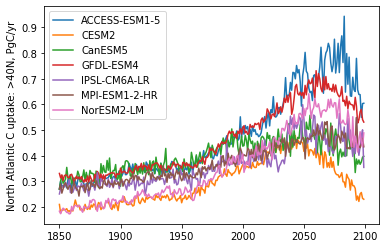

In [5]:
#plt.plot(year,fgco2_global)
plt.plot(year,fgco2_NA)
plt.legend(model)
plt.ylabel('North Atlantic C uptake: >'+str(latlim)+'N, PgC/yr')    

In [6]:
# calculate the spatial pattern
cfac=1/12*1e3*365.25*86400
#
peakyr585=np.empty((Nm,180,360))
#
for n in range(Nm):
    ds=xr.open_dataset(fn[n])
    fgco2=ds.fgco2.sel(time=slice('1850-01','2099-12')).groupby('time.year').mean(dim='time')
    year=fgco2.year.to_numpy()
    for j in range(180):
        for i in range(360):
            c=fgco2.isel(lon=i).isel(lat=j).to_numpy()
            ind=np.argmax(c)
            peakyr585[n,j,i]=year[ind]

/global/homes/t/takaito/miniconda3/envs/calc/lib/python3.8/site-packages/xarray/coding/times.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/global/homes/t/takaito/miniconda3/envs/calc/lib/python3.8/site-packages/xarray/coding/times.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/global/homes/t/takaito/miniconda3/envs/calc/lib/python3.8/site-packages/xarray/core/indexing.py:422: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/global/h

In [7]:
peakyr585=np.where(peakyr585==1850,np.nan,peakyr585)
x=ds.lon
y=ds.lat
da=xr.DataArray(data=peakyr585,name='peak_year',dims=['model','lat','lon'],
               coords={'model':model,'lat':y,'lon':x})
ds=da.to_dataset()

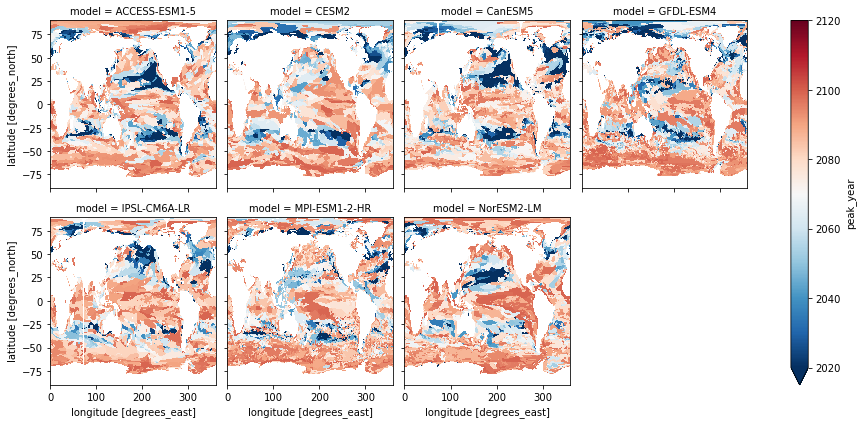

In [8]:
ds.peak_year.plot(col='model',col_wrap=4,vmin=2020,vmax=2120,cmap='RdBu_r')

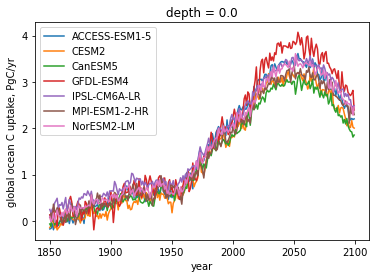

In [9]:
fn=[]
Nm=np.size(model)
# calculate global uptake
R=6.37e6
cfac=1/12*1e3*365.25*86400*12e-15
dx=1
latlim=40
fgco2_global=np.empty((250,Nm))
fgco2_NA=np.empty((250,Nm))
#
for n in range(Nm):
    fn.append(diro+model[n]+'/fgco2_'+model[n]+'_Omon_hsp245_woagrid.nc')
    ds=xr.open_dataset(fn[n])
    weights=np.cos(np.deg2rad(ds.lat))*(R*np.pi/180*dx)**2
    weights.name = "weights"
    #
    fgco20=ds.fgco2.sel(time=slice('1850-01','2099-12')).groupby('time.year').mean(dim='time')
    year=fgco20.year
    #
    fgco2=fgco20#.where((ds.lat>=latlim)&((ds.lon>(360-85))|(ds.lon<10))) 
    fgco2_weighted=fgco2.weighted(weights)
    co2uptake=cfac*fgco2_weighted.sum(('lon','lat'))
    #
    fgco2=fgco20.where((ds.lat>=latlim)&((ds.lon>(360-85))|(ds.lon<10))) 
    fgco2_weighted=fgco2.weighted(weights)
    co2uptake_NA=cfac*fgco2_weighted.sum(('lon','lat'))
    #
    co2uptake.plot(label=model[n])
    fgco2_global[:,n]=co2uptake.to_numpy()
    fgco2_NA[:,n]=co2uptake_NA.to_numpy()
    #
plt.ylabel('global ocean C uptake, PgC/yr')    
plt.legend()
plt.show()

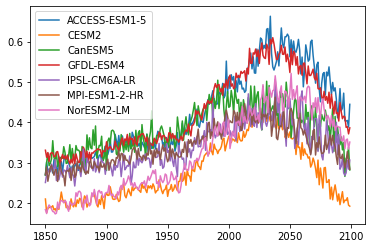

In [10]:
#plt.plot(year,fgco2_global)
plt.plot(year,fgco2_NA)
plt.legend(model)

In [11]:
# calculate the spatial pattern
cfac=1/12*1e3*365.25*86400
#
peakyr245=np.empty((Nm,180,360))
#
for n in range(Nm):
    ds=xr.open_dataset(fn[n])
    fgco2=ds.fgco2.sel(time=slice('1850-01','2099-12')).groupby('time.year').mean(dim='time')
    year=fgco2.year.to_numpy()
    for j in range(180):
        for i in range(360):
            c=fgco2.isel(lon=i).isel(lat=j).to_numpy()
            ind=np.argmax(c)
            peakyr245[n,j,i]=year[ind]

In [12]:
peakyr245=np.where(peakyr245==1850,np.nan,peakyr245)
x=ds.lon
y=ds.lat
da=xr.DataArray(data=peakyr245,name='peak_year',dims=['model','lat','lon'],
               coords={'model':model,'lat':y,'lon':x})
ds=da.to_dataset()

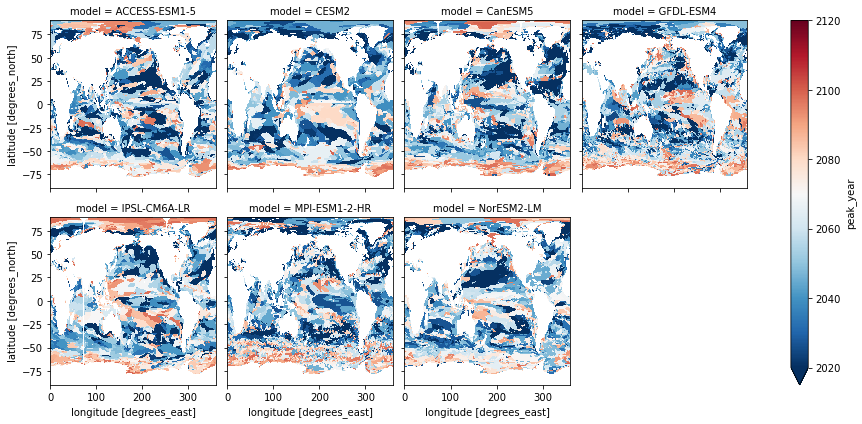

In [13]:
ds.peak_year.plot(col='model',col_wrap=4,vmin=2020,vmax=2120,cmap='RdBu_r')